# Using Cellular Communication Sensing to Support Early Recovery from

Alcohol Use Disorder

Kendra Wyant [](https://orcid.org/0000-0002-0767-7589) (Department of Psychology, University of Wisconsin-Madison)  
Coco Yu [](https://orcid.org/0000-0002-7731-0563) (Department of Psychology, University of Wisconsin-Madison)  
John J. Curtin [](https://orcid.org/0000-0002-3286-938X) (Department of Psychology, University of Wisconsin-Madison)  
October 17, 2025

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

# Introduction

Alcohol Use Disorder (AUD) is a chronic, relapsing disease \[@mclellanDrugDependenceChronic2000;@dennisManagingAddictionChronic2007; @rounsavilleLapseRelapseChasing2010\]. Lapses, single episodes of alcohol use, and relapse, a full return to harmful drinking, can occur at any point in recovery \[@scottPathwaysRelapseTreatment2005;@nguyenPredictingRelapseAlcohol2020a; @witkiewitzPredictorsHeavyDrinking2011; @kirshenbaumQuantitativeReviewUbiquitous2009\]. As with other chronic health conditions where symptoms fluctuate, sometimes unexpectedly, sustained AUD recovery requires ongoing monitoring of lapse risk.

Machine learning–guided recovery systems may now assist with the inherently difficult task of identifying when and why someone is at increased risk. Personal sensing of densely sampled data from individuals’ day-to-day lives can provide the inputs necessary for temporally dynamic lapse predictions \[@mohrPersonalSensingUnderstanding2017\]. Early models using ecological momentary assessment data have achieved excellent accuracy \[@chihPredictiveModelingAddiction2014; @wyantMachineLearningModels2024; @wyantForecastingRiskAlcoholunderreview\]. Still, questions remain about the long-term feasibility of self-report sensing methods and whether new, important risk factors might emerge from sensing methods that passively collect smartphone data without user input.

Cellular communication sensing may be one promising method. It offers the potential for greater temporal specificity in capturing fluctuations in risk compared with self-report data. Collecting communication data in near real time could allow an algorithm to detect potential triggers as they occur, without prompting users to reflect on their feelings or waiting for users to report about their environement at a later point. For example, late night phone calls could indicate an emergency, “drunk dialing”, or other risk-relevant interactions, while an expanding or shrinking social circle could be characterized by the number of unique contacts someone has communicated with.

These data may become even more powerful when communication contacts are contextualized with personal meaning for a given participant (e.g., Who is this contact to them? How pleasant or unpleasant is a typical interaction with them? Have they drank with them in the past?). In this scenario, contextualized communication logs might reveal that the late-night phone call was to a sponsor, or that the shrinking social circle was due to reduced contact with people who are unsupportive of their recovery.

In this study, we evaluated the performance of a machine learning model that predicts the probability of a next-day lapse using contextualized cellular communication data. We also describe the most important features contributing to these predictions, with the goal of identifying new, clinically meaningful features emerging from communication-based sensing.

# Methods

## Participants and Procedure

We recruited adults in early recovery from AUD in Madison, Wisconsin, through print and digital advertisements and partnerships with treatment centers. Eligibility criteria required that participants were age 18 or older, able to read and write in English, had moderate to severe AUD [1], had been abstinent from alcohol for 1–8 weeks, were willing to use a single smartphone, and were not exhibiting severe psychosis or paranoia.[2]

Participants completed up to 5 study visits over approximately 3 months: a screening visit, intake visit, and 3 monthly follow-up visits. At screening we collected demographic information (age, sex at birth, race, ethnicity, education, marital status, employment, and income) and clinical characteristics (DSM-5 AUD symptom count, alcohol problems \[@hurlbutAssessingAlcoholProblems1992\], and presence of psychological symptoms \[@derogatislBriefSymptomInventory\]). At intake we collected additional self-report data on abstinence self-efficacy \[@mckiernanDevelopmentBriefAbstinence2011\], craving \[@flanneryPsychometricPropertiesPenn1999\], and recent recovery efforts. At each monthly follow-up, we downloaded cellular communication metadata (voice calls and SMS text message logs) from participants’ smartphones. We identified important contacts (i.e., individuals they had communicated with at least twice by call or text in the past month) and asked 7 contextual questions about these contacts.

While enrolled, participants completed 4 brief daily ecological momentary assessments (7-10 questions). The first item assessed alcohol use (date and time of any unreported drinking episodes). Lapse reports were verified at follow-up visits using a timeline follow-back interview. Additional sensing data streams and self-report measures were collected for the parent grant. The full study protocol is available on our Open Science Framework page (<https://osf.io/wgpz9/>).

We screened 192 participants. Of these, 169 enrolled and 154 completed the first follow-up. Data from 10 participants were excluded due to loss of abstinence goals, careless responding, or unusually low compliance. The final analytic sample included 144 participants.

## Data Analysis Plan

Our models predicted the probability of an alcohol lapse within a 24-hour window. Predictions were generated daily at 4 a.m., beginning on participants’ second study day and continuing for up to 3 months. In total, there were 11,507 labeled prediction windows across all participants.

Features were engineered from all available data up to the start of each window.[3] The full model included 406 features from cellular communication data plus 24 features from baseline self-report measures. We also evaluated a comparison model that used only the baseline features. @tbl-1 details the raw predictors and feature engineering procedures.

Candidate model configurations differed by algorithm (elastic net, random forest, XGBoost), outcome resampling method, and hyperparameter values. The best configuration for each model was selected using 6 repeats of participant-grouped 5-fold cross-validation. Our performance metric was area under the receiver operating curve (auROC). Folds were stratified by a between-subject measure of our outcome (low lapsers: 0-9 lapses; high lapsers: 10+ lapses).

We evaluated model performance with a Bayesian hierarchical generalized linear model. Posterior distributions with 95% credible intervals (CI) were estimated from the 30 held-out test sets using weakly informative, data-dependent priors to regularize and reduce overfitting.[4] Random intercepts were included for repeat and fold (nested within repeat). auROCs were logit-transformed and regressed on model type to estimate the probability that model performances differed systematically.

Our best performing models used an elastic net algorithm. We quantified feature importance by examining the retained features (i.e., coefficient value \> 0) in the full model and ordering them by absolute coefficient value. These values provide an estimate of the direction and magnitude of association between each predictor and the outcome, conditional on the other features retained. All our annotated analysis scripts are publicly available on our study website (<https://jjcurtin.github.io/study_messages/>).

``` python
feats |> 
  knitr::kable() |> 
  kable_classic() 
```

  Raw Predictor                                                                        Response Options                                         Feature Engineering                                                                                        Scoring Epochs                                             Total Features Full Model   Baseline Model
  ------------------------------------------------------------------------------------ -------------------------------------------------------- ---------------------------------------------------------------------------------------------------------- -------------------------------------------------------- ---------------- ------------ ----------------
  Originated                                                                           Incoming, outgoing                                       Difference and raw rate counts for text messages and voice calls                                           6, 12, 24, 48, 72, and 168 hours                                       48 Yes          No
  Call duration                                                                        Duration (in minutes)                                    Difference and raw rate sums of duration, difference and raw most recent duration                          6, 12, 24, 48, 72, and 168 hours                                       14 Yes          No
  Call answered                                                                        Yes, no                                                  Difference and raw rate counts for unanswered incoming voice calls                                         6, 12, 24, 48, 72, and 168 hours                                       12 Yes          No
  Date/time of communication                                                           Date and time                                            Difference and raw rate counts for text messages and voice calls at night (10 pm -- 6am) and on weekends   24, 48, 72, and 168 hours (night), 168 hours (weekend)                 20 Yes          No
  Phone number                                                                         Phone number                                             Difference and raw rate counts of unique phone numbers                                                     6, 12, 24, 48, 72, and 168 hours                                       12 Yes          No
  Type of Relationship                                                                 Family, friend, counselor or social worker, co-worker    Difference and raw rate counts of unique phone numbers                                                     6, 12, 24, 48, 72, and 168 hours                                       48 Yes          No
  Have you drank alcohol with this person?                                             Never/almost never, occasionally, almost always/always   Difference and raw rate counts of each response option                                                     6, 12, 24, 48, 72, and 168 hours                                       36 Yes          No
  What is their drinking status?                                                       Drinker, non-drinker, don't know                         Difference and raw rate counts of each response option                                                     6, 12, 24, 48, 72, and 168 hours                                       36 Yes          No
  Would you expect them to drink in your presence?                                     Yes, no, uncertain                                       Difference and raw rate counts of each response option                                                     6, 12, 24, 48, 72, and 168 hours                                       36 Yes          No
  Are they currently in recovery from drugs or alcohol?                                Yes, no, don't know                                      Difference and raw rate counts of each response option                                                     6, 12, 24, 48, 72, and 168 hours                                       36 Yes          No
  Are they supportive about your recovery goals?                                       Supportive, unsupportive, mixed, neutral, don't know     Difference and raw rate counts of each response option                                                     6, 12, 24, 48, 72, and 168 hours                                       60 Yes          No
  How are your typical experiences with this person?                                   Pleasant, unpleasant, mixed, neutral                     Difference and raw rate counts of each response option                                                     6, 12, 24, 48, 72, and 168 hours                                       48 Yes          No
  DSM-5 symptom count                                                                  Numeric (4-11)                                                                                                                                                                                                                              1 Yes          Yes
  Past year alcohol problems                                                           Numeric (0-27)                                                                                                                                                                                                                              1 Yes          Yes
  Craving                                                                              Numeric (0-30)                                                                                                                                                                                                                              1 Yes          Yes
  Abstinence self-efficacy: Negative affect, social, physical, and craving subscales   Numeric (0-20)                                                                                                                                                                                                                              4 Yes          Yes
  Number of individual alcohol counseling sessions attended (past 30 days)             Numeric                                                                                                                                                                                                                                     1 Yes          Yes
  Number of group alcohol counseling sessions attended (past 30 days)                  Numeric                                                                                                                                                                                                                                     1 Yes          Yes
  Number of self-help group meetings attended (past 30 days)                           Numeric                                                                                                                                                                                                                                     1 Yes          Yes
  Number of other mental health counseling sessions attended (past 30 days)            Numeric                                                                                                                                                                                                                                     1 Yes          Yes
  Number of days in contact with supportive people (past 30 days)                      Numeric                                                                                                                                                                                                                                     1 Yes          Yes
  Number of days in contact with unsupportive people (past 30 days)                    Numeric                                                                                                                                                                                                                                     1 Yes          Yes
  Taken prescribed medication for alcohol use disorder (past 30 days)                  Yes, no                                                  Dummy coded                                                                                                                                                                        1 Yes          Yes
  Taken prescribed medication for other mental health disorder (past 30 days)          Yes, no                                                  Dummy coded                                                                                                                                                                        1 Yes          Yes
  Satisfaction with progress toward recovery goals (past 30 days)                      Numeric (0-4)                                                                                                                                                                                                                               1 Yes          Yes
  Confidence in abstinence ability (next 30 days)                                      Numeric (0-4)                                                                                                                                                                                                                               1 Yes          Yes
  Has a goal of abstinence                                                             Yes, no, uncertain                                       Dummy coded                                                                                                                                                                        2 Yes          Yes
  Age                                                                                  Numeric (years)                                                                                                                                                                                                                             1 Yes          Yes
  Sex at birth                                                                         Male, female                                             Dummy coded                                                                                                                                                                        1 Yes          Yes
  Race                                                                                 Non-Hispanic White, non-White and/or Hispanic            Dummy coded                                                                                                                                                                        1 Yes          Yes
  Education                                                                            High school or less, some college, college degree        Dummy coded                                                                                                                                                                        2 Yes          Yes
  Income                                                                               Numeric (dollars)                                                                                                                                                                                                                           1 Yes          Yes
  Marital Status                                                                       Married, not married, other                              Dummy coded                                                                                                                                                                        2 Yes          Yes

[1] (≥4 self-reported DSM-5 symptoms)

[2] Defined as scores \>2.2 or 2.8, respectively, on the psychosis or paranoia scales of the Symptom Checklist–90 \[@derogatislBriefSymptomInventory\].

[3] We filtered the data to include only communications with known context prior to feature engineering.

[4] Residual SD ~ normal(0, exp(2)); intercept (centered predictors) ~ normal(2.3, 1.3); window-width contrasts ~ normal(0, 2.69); covariance ~ decov(1,1,1,1).

## Ethical Considerations

All procedures were approved by the University of Wisconsin-Madison Institutional Review Board (Study #2015-0780). All participants provided written informed consent.

# Results

## Participants

@tbl-2 provides the demographic characterization of our sample. We obtained a total of 375,912 contextualized communications across participants. Participants had, on average, 2,610 communications (range = 109-14,225). 56% of participants reported at least one lapse.

``` python
footnote_table_dem_a <- "N = 144"


table_dem |> 
  knitr::kable() |> 
  kable_classic() |> 
  kableExtra::group_rows(start_row = 3, end_row = 4) |> 
  kableExtra::group_rows(start_row = 6, end_row = 10) |> 
  kableExtra::group_rows(start_row = 12, end_row = 13) |> 
  kableExtra::group_rows(start_row = 15, end_row = 20) |> 
  kableExtra::group_rows(start_row = 22, end_row = 30) |> 
  kableExtra::group_rows(start_row = 33, end_row = 37) |> 
  kableExtra::footnote(general = c(footnote_table_dem_a), escape=FALSE)
```

                                                             N     \% M          SD         Range
  ------------------------------------------------------ ----- ------ ---------- ---------- -------------
  Age                                                                 40.4       11.8       21-72
  Sex at Birth                                                                              
                                                                                            
  Female                                                    74   51.4                       
  Male                                                      70   48.6                       
  Race                                                                                      
                                                                                            
  American Indian/Alaska Native                              3    2.1                       
  Asian                                                      2    1.4                       
  Black/African American                                     8    5.6                       
  White/Caucasian                                          125   86.8                       
  Other/Multiracial                                          6    4.2                       
  Hispanic, Latino, or Spanish origin                                                       
                                                                                            
  Yes                                                        3    2.1                       
  No                                                       141   97.9                       
  Education                                                                                 
                                                                                            
  Less than high school or GED degree                        1    0.7                       
  High school or GED                                        14    9.7                       
  Some college                                              39   27.1                       
  2-Year degree                                             13    9.0                       
  College degree                                            55   38.2                       
  Advanced degree                                           22   15.3                       
  Employment                                                                                
                                                                                            
  Employed full-time                                        70   48.6                       
  Employed part-time                                        25   17.4                       
  Full-time student                                          7    4.9                       
  Homemaker                                                  1    0.7                       
  Disabled                                                   7    4.9                       
  Retired                                                    8    5.6                       
  Unemployed                                                15   10.4                       
  Temporarily laid off, sick leave, or maternity leave       3    2.1                       
  Other, not otherwise specified                             8    5.6                       
  Personal Income                                                     \$35,050   \$32,069   \$0-200,000
  Marital Status                                                                            
                                                                                            
  Never married                                             63   43.8                       
  Married                                                   32   22.2                       
  Divorced                                                  42   29.2                       
  Separated                                                  5    3.5                       
  Widowed                                                    2    1.4                       
  [Note: ]{style="font-style: italic;"}                                                     
  N = 144                                                                                   

## Model Evaluation

The median posterior auROC for the full model was 0.68, with relatively narrow 95% CI (\[0.64, 0.71\]) that did not contain .5. This provides strong evidence that the model is capturing signal in the data. The final model retained 13 features (@fig-1). The top four were baseline measures of abstinence confidence, having a goal of abstinence, abstinence self-efficacy when experiencing negative affect, and craving. Communication frequency with people unaware of the individual’s recovery goals also emerged as an important feature associated with increased lapse risk.

We evaluated a comparison model to assess the incremental predictive value of cellular communication features beyond baseline measures. The baseline model retained 5 features and achieved performance nearly identical to the full model (median auROC = 0.68, 95% CI \[0.64, 0.71\]). The median difference in auROC between the full and baseline models was less than .01, providing no evidence (52% probability) that their posterior distributions were meaningfully different.

``` python
feat_imp 
```

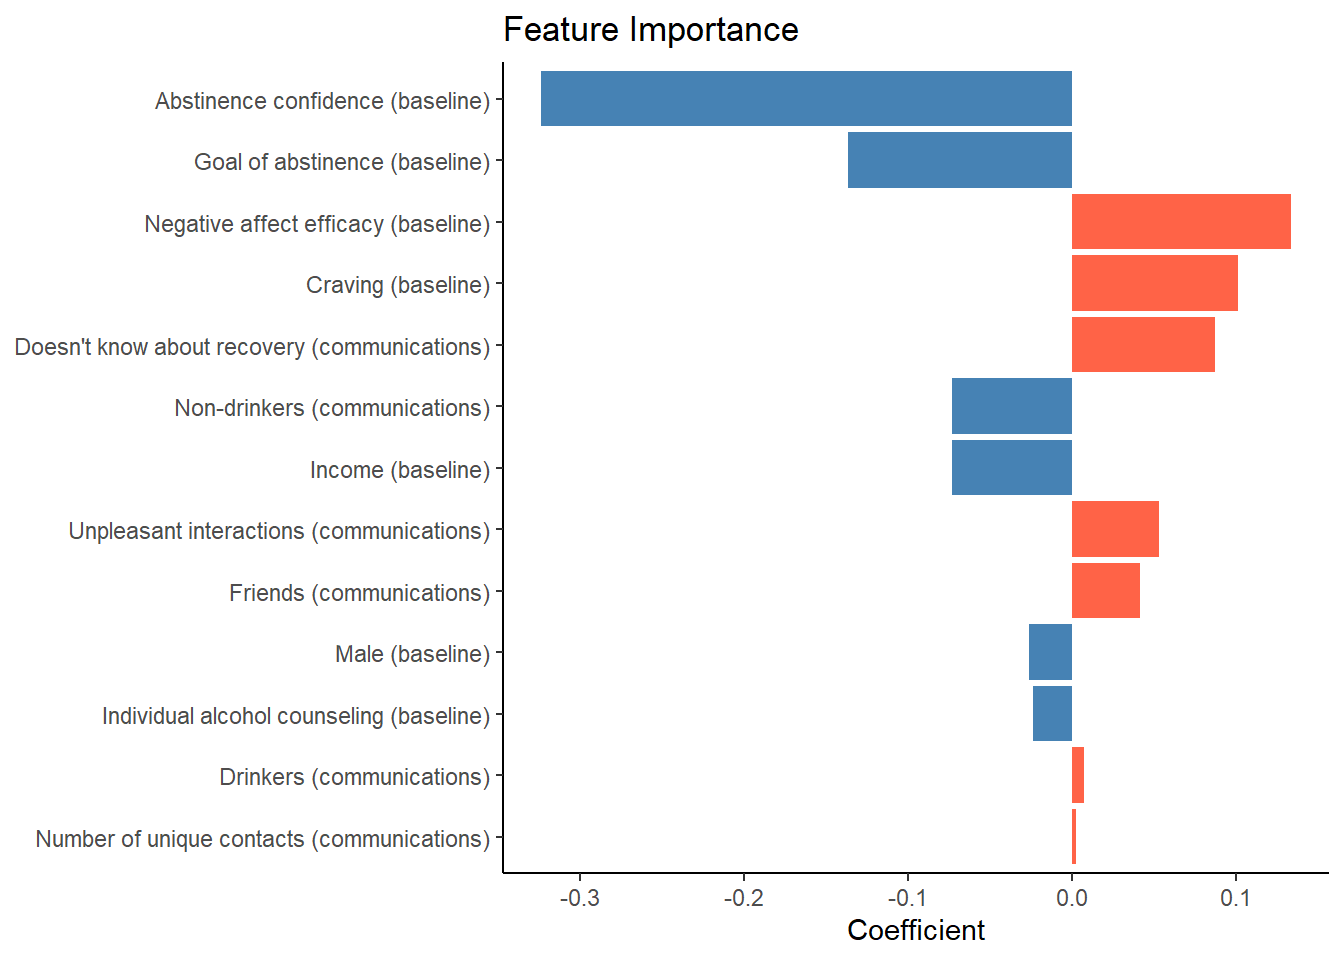

# Discussion

Our machine learning model incorporating cellular communications achieved fair performance, with an auROC of 0.68, indicating that some predictive signal was present. However, it did not offer incremental value beyond a baseline model that included only demographic and self-report measures.

Consistent with this, the four most important predictors in our model were all self-report variables: abstinence confidence, abstinence goal, negative affect efficacy, and craving. Nonetheless, several communication features were retained in the final model with moderately sized coefficients. These included communications with people unaware of the participant’s recovery status, non-drinkers, friends, and individuals who were unpleasant to interact with. Thus, the context surrounding communications may still offer some insight into lapse vulnerability.

In contrast, raw counts of calls and text messages and call durations were not retained in the final model. This implies that the quantity of communication may be less informative than the quality and social significance. Future research may benefit from collecting richer contextual data about communication contacts to better understand the social dynamics contributing to lapse risk. Even with highly contextualized communication data, however, prediction may be limited by data sparsity. Many participants had few daily communications, and some had extended periods with no recorded interactions at all.

Our study design may have further contributed to this limitation. We collected only phone and SMS text communications through the native smartphone app. Yet, in recent years, many individuals have shifted their primary communication to private messaging apps (e.g., WhatsApp, Signal) or social media platforms (e.g., Facebook Messenger, Instagram) \[@mcdowellPreferencesAttitudesDigital2025\]. As a result, our dataset likely missed a substantial portion of participants’ social interactions. Future studies could explore whether data from these platforms yield stronger predictive signal.

We can not entirely dismiss the potential value of cellular communication data for risk prediction. For example, researchers have successfully incorporated communication data with other sensing methods, such as accelerometer, geolocation, and device useage data to predict alcohol use episodes \[@baeDetectingDrinkingEpisodes2017; @baeLeveragingMobilePhone2023\]. However, even in these instances, the contribution of cellular communications is questionable and other sensing methods like geolocation appear to be more promising. Other practical challenges for collecting call and text message (e.g., Apple heavily restricts the collection of these data from apps in their app store) further limit the feasibility of using this sensing method. These findings lead us to conclude that other forms of social interaction characterization (e.g., engineering time spent with supportive contacts from geolocation data) are more worthwhile to pursue in future research.